In [55]:
!pip install Sastrawi
!pip install nltk
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 647 kB 5.1 MB/s 
     |████████████████████████████████| 281 kB 55.0 MB/s 
     |████████████████████████████████| 140 kB 43.8 MB/s 
  Created wheel for swifter: filename=swifter-1.1.3-py3-none-any.whl size=13078 sha256=25ca5f4b3d7d3533ee4e7c565de5de8fb1210a1a96c13cb63eb58bf2e30cd1c4
  Stored in directory: /root/.cache/pip/wheels/e8/1a/1b/46aa7b0fac16d3ce1bccaac14bfe4fad972642217ae78d8160
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [56]:
import re
import nltk
import string
import swifter
import pandas as pd
import seaborn as sns
from nltk import word_tokenize 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn import preprocessing
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# nltk.download("stopwords")
# nltk.download('punkt')

palette=sns.color_palette('magma')
sns.set(palette=palette)

In [34]:
df = pd.read_csv("Data Fix.csv")
df.head()

,reviewId,userName,userImage,review,rating,date,replyReview,repliedAt,Source,Sentimen
0,gp:AOqpTOEnUbk_19-MO6sPHl7z9Z5Dvv2zmmd5NY5Tcm8...,Della Nis94,https://play-lh.googleusercontent.com/a/AATXAJ...,Waktu blm di upgrade ataupun udah upgrage sama...,1,5/19/2022 7:37,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",5/20/2022 16:50,Google Play Store,Negative
1,gp:AOqpTOE-i_4JaevUcEqVHqOGXjj_JLsRO35lZeEgJU4...,Jakarta Review,https://play-lh.googleusercontent.com/a-/AOh14...,Kirim kode verifikasi email gak masuk2 sampe s...,1,4/20/2022 10:01,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",4/20/2022 14:37,Google Play Store,Negative
2,gp:AOqpTOEpoOwOrsQPdu95u3g2IOcGGWUuurm70hWbqXs...,Shasha Rose,https://play-lh.googleusercontent.com/a-/AOh14...,saya minta verifikasi sampe 3 kali gagal. teru...,2,4/7/2022 5:04,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",4/7/2022 15:34,Google Play Store,Negative
3,gp:AOqpTOGVbFw4LlhptIBTpsK1oThh1a_AwdKaxfaSvQX...,Kris Panji Mukti,https://play-lh.googleusercontent.com/a/AATXAJ...,Tolong perbaiki masalah untuk pendaftaran vaks...,3,4/4/2022 22:29,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",4/5/2022 10:51,Google Play Store,Negative
4,gp:AOqpTOH7dBxQ2t4OLHM5M0pP4h-_vbwOX5xPK-SA2Lu...,Dwi Wiharti,https://play-lh.googleusercontent.com/a/AATXAJ...,Saya sudah daftar untuk vaksin booster moderna...,1,5/14/2022 7:28,"Hi kak, mohon maaf atas ketidaknyamanannya. Mo...",5/18/2022 13:47,Google Play Store,Negative


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   reviewId     2080 non-null   object
 1   userName     2222 non-null   object
 2   userImage    2080 non-null   object
 3   review       2222 non-null   object
 4   rating       2222 non-null   int64 
 5   date         2222 non-null   object
 6   replyReview  1947 non-null   object
 7   repliedAt    1817 non-null   object
 8   Source       2222 non-null   object
 9   Sentimen     2222 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.7+ KB


In [36]:
dateYear = pd.DatetimeIndex(df['date']).year

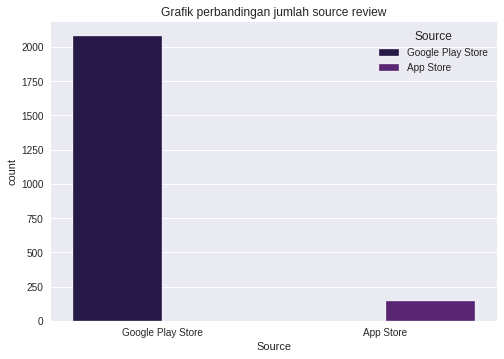

<Figure size 720x720 with 0 Axes>

In [37]:
# Visualisasi perbandingan jumlah source review

plt.style.use("seaborn")
plt.title("Grafik perbandingan jumlah source review")
sns.countplot(x="Source", hue="Source", data=df, palette=palette)
plt.figure(figsize=(10, 10))
plt.show()

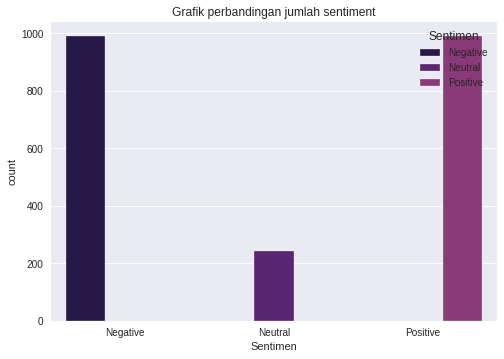

<Figure size 720x720 with 0 Axes>

In [38]:
# Visualisasi perbandingan jumlah sentiment

plt.style.use("seaborn")
plt.title("Grafik perbandingan jumlah sentiment")
sns.countplot(x="Sentimen", hue="Sentimen", data=df, palette=palette)
plt.figure(figsize=(10, 10))
plt.show()

# Data Preparation

In [39]:
# Menghapus kolom yang tidak akan digunakan

df.drop(["reviewId"], axis=1, inplace=True)
df.drop(["userImage"], axis=1, inplace=True)
df.drop(["rating"], axis=1, inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.drop(["replyReview"], axis=1, inplace=True)
df.drop(["repliedAt"], axis=1, inplace=True)
df.drop(["Source"], axis=1, inplace=True)

df.head()

,userName,review,Sentimen
0,Della Nis94,Waktu blm di upgrade ataupun udah upgrage sama...,Negative
1,Jakarta Review,Kirim kode verifikasi email gak masuk2 sampe s...,Negative
2,Shasha Rose,saya minta verifikasi sampe 3 kali gagal. teru...,Negative
3,Kris Panji Mukti,Tolong perbaiki masalah untuk pendaftaran vaks...,Negative
4,Dwi Wiharti,Saya sudah daftar untuk vaksin booster moderna...,Negative


In [40]:
# Konversi data kategorik menjadi data numerik

label_encoder = preprocessing.LabelEncoder()
df['Sentimen']= label_encoder.fit_transform(df['Sentimen']) 

In [41]:
df.head(100)

,userName,review,Sentimen
0,Della Nis94,Waktu blm di upgrade ataupun udah upgrage sama...,0
1,Jakarta Review,Kirim kode verifikasi email gak masuk2 sampe s...,0
2,Shasha Rose,saya minta verifikasi sampe 3 kali gagal. teru...,0
3,Kris Panji Mukti,Tolong perbaiki masalah untuk pendaftaran vaks...,0
4,Dwi Wiharti,Saya sudah daftar untuk vaksin booster moderna...,0
...,...,...,...
95,Fini Husnul,Aplikasi yang sangat baik,2
96,Laura Kastaningrum,Sebetulnya banyak info yang bagus di aplikasi ...,2
97,fhmy milanisti,Mohon tambahkan untuk pembayaran pajak via onl...,1
98,Ambar Diantoro,"Terimakasih kasih Jaki, Saya dan keluarga sang...",2


# Data preprocessing

In [42]:
# 1. Case Folding -> Mengubah text menjadi format yang sama
df["review"] = df["review"].str.lower()
df.head()

,userName,review,Sentimen
0,Della Nis94,waktu blm di upgrade ataupun udah upgrage sama...,0
1,Jakarta Review,kirim kode verifikasi email gak masuk2 sampe s...,0
2,Shasha Rose,saya minta verifikasi sampe 3 kali gagal. teru...,0
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0


In [43]:
# 2. Cleansing

def cleansing_text(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    text = text.replace("http://", " ").replace("https://", " ")
    # menghapus punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # menghapus single char
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    # menghapus number
    text = re.sub(r"\d+", " ", text)

    return text

In [44]:
df['review'] = df['review'].apply(cleansing_text)

df

,userName,review,Sentimen
0,Della Nis94,waktu blm di upgrade ataupun udah upgrage sama...,0
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0
...,...,...,...
2217,123..45..67,ga bisa download sppt pbb dibilang nik salah u...,0
2218,Suryono888,abis di update ga bisa lapor,0
2219,rirenur30,aplikasi cepat tanggap semoga pelayanan nya ma...,2
2220,Aserehehehe,jaki keren tinggal tambahin rute moda transpor...,2


In [45]:
#3. Tokenisasi 
def word_tokenize(text):
    return word_tokenize(text)

In [49]:
df['review_tokenize'] = df['review'].apply(word_tokenize)

df.head()

,userName,review,Sentimen,review_tokenize
0,Della Nis94,waktu blm di upgrade ataupun udah upgrage sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra..."
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s..."
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ..."
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran..."
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ..."


In [50]:
#4. Filtering (Stop word removal) 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [51]:
def stopwords_removal(text):
    return [word for word in text if word not in stopwords]

df["review_stopwords"] = df["review_tokenize"].apply(stopwords_removal)
df.head()

,userName,review,Sentimen,review_tokenize,review_stopwords
0,Della Nis94,waktu blm di upgrade ataupun udah upgrage sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra...","[waktu, blm, upgrade, ataupun, udah, upgrage, ..."
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, gak, masuk, s..."
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ...","[minta, verifikasi, sampe, kali, gagal, terus,..."
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran...","[perbaiki, masalah, pendaftaran, vaksin, nomor..."
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ...","[daftar, vaksin, booster, moderna, melalui, ap..."


In [52]:
#5. Normalization
normalizad_word = pd.read_csv("colloquial-indonesian-lexicon.csv")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [54]:
df['review_normalized'] = df['review_stopwords'].apply(normalized_term)

df

,userName,review,Sentimen,review_tokenize,review_stopwords,review_normalized
0,Della Nis94,waktu blm di upgrade ataupun udah upgrage sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra...","[waktu, blm, upgrade, ataupun, udah, upgrage, ...","[waktu, belum, upgrade, ataupun, sudah, upgrag..."
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, enggak, masuk..."
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ...","[minta, verifikasi, sampe, kali, gagal, terus,...","[meminta, verifikasi, sampai, kali, gagal, ter..."
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran...","[perbaiki, masalah, pendaftaran, vaksin, nomor...","[perbaiki, masalah, pendaftaran, vaksin, nomor..."
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ...","[daftar, vaksin, booster, moderna, melalui, ap...","[daftar, vaksin, booster, moderna, melalui, ap..."
...,...,...,...,...,...,...
2217,123..45..67,ga bisa download sppt pbb dibilang nik salah u...,0,"[ga, bisa, download, sppt, pbb, dibilang, nik,...","[ga, download, sppt, pbb, dibilang, nik, salah...","[enggak, download, sppt, pbb, dibilang, nik, s..."
2218,Suryono888,abis di update ga bisa lapor,0,"[abis, di, update, ga, bisa, lapor]","[abis, update, ga, lapor]","[habis, update, enggak, lapor]"
2219,rirenur30,aplikasi cepat tanggap semoga pelayanan nya ma...,2,"[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ..."
2220,Aserehehehe,jaki keren tinggal tambahin rute moda transpor...,2,"[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahkan, rute, moda, ..."


In [57]:
#5. Stemming
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['review_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['review_stemmed'] = df['review_normalized'].swifter.apply(get_stemmed_term)

4011
------------------------
waktu : waktu
belum : belum
upgrade : upgrade
ataupun : atau
sudah : sudah
upgrage : upgrage
sama : sama
ajamau : ajamau
daftar : daftar
antrian : antri
faskes : faskes
gangguan : ganggu
terus : terus
berharihari : berharihari
enggak : enggak
benar : benar
juga : juga
diperbaiki : baik
kerjanya : kerja
kirim : kirim
kode : kode
verifikasi : verifikasi
email : email
masuk : masuk
sampai : sampai
nya : nya
aplikasi : aplikasi
pemerintah : perintah
selalu : selalu
ampas : ampas
kerja : kerja
orang : orang
bawaan : bawa
sih : sih
perbaiki : baik
lah : lah
meminta : minta
kali : kali
gagal : gagal
padahal : padahal
nomor : nomor
ktpnama : ktpnama
foto : foto
sesuai : sesuai
mana : mana
sekalinya : sekali
jam : jam
hari : hari
coba : coba
mendaftarkan : daftar
langsung : langsung
no : no
ktp : ktp
nama : nama
lengkap : lengkap
capcha : capcha
not : not
valid : valid
sering : sering
error : error
masalah : masalah
pendaftaran : daftar
vaksin : vaksin
kok : kok
en

Pandas Apply:   0%|          | 0/2222 [00:00<?, ?it/s]

In [64]:
df

,userName,review,Sentimen,review_tokenize,review_stopwords,review_normalized,review_stemmed,review_clean
0,Della Nis94,waktu blm di upgrade ataupun udah upgrage sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra...","[waktu, blm, upgrade, ataupun, udah, upgrage, ...","[waktu, belum, upgrade, ataupun, sudah, upgrag...","[waktu, belum, upgrade, atau, sudah, upgrage, ...",waktu belum upgrade atau sudah upgrage sama aj...
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, enggak, masuk...","[kirim, kode, verifikasi, email, enggak, masuk...",kirim kode verifikasi email enggak masuk sampa...
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ...","[minta, verifikasi, sampe, kali, gagal, terus,...","[meminta, verifikasi, sampai, kali, gagal, ter...","[minta, verifikasi, sampai, kali, gagal, terus...",minta verifikasi sampai kali gagal terus padah...
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran...","[perbaiki, masalah, pendaftaran, vaksin, nomor...","[perbaiki, masalah, pendaftaran, vaksin, nomor...","[baik, masalah, daftar, vaksin, nomor, ktp, na...",baik masalah daftar vaksin nomor ktp nama sesu...
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ...","[daftar, vaksin, booster, moderna, melalui, ap...","[daftar, vaksin, booster, moderna, melalui, ap...","[daftar, vaksin, booster, moderna, lalu, aplik...",daftar vaksin booster moderna lalu aplikasi ja...
...,...,...,...,...,...,...,...,...
2217,123..45..67,ga bisa download sppt pbb dibilang nik salah u...,0,"[ga, bisa, download, sppt, pbb, dibilang, nik,...","[ga, download, sppt, pbb, dibilang, nik, salah...","[enggak, download, sppt, pbb, dibilang, nik, s...","[enggak, download, sppt, pbb, bilang, nik, sal...",enggak download sppt pbb bilang nik salah suda...
2218,Suryono888,abis di update ga bisa lapor,0,"[abis, di, update, ga, bisa, lapor]","[abis, update, ga, lapor]","[habis, update, enggak, lapor]","[habis, update, enggak, lapor]",habis update enggak lapor
2219,rirenur30,aplikasi cepat tanggap semoga pelayanan nya ma...,2,"[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, moga, layan, nya, m...",aplikasi cepat tanggap moga layan nya makin ti...
2220,Aserehehehe,jaki keren tinggal tambahin rute moda transpor...,2,"[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahkan, rute, moda, ...","[jaki, keren, tinggal, tambah, rute, moda, tra...",jaki keren tinggal tambah rute moda transporta...


# Data final

In [62]:
df["review_clean"] = [' '.join(map(str, l)) for l in df['review_stemmed']]

In [63]:
df

,userName,review,Sentimen,review_tokenize,review_stopwords,review_normalized,review_stemmed,review_clean
0,Della Nis94,waktu blm di upgrade ataupun udah upgrage sama...,0,"[waktu, blm, di, upgrade, ataupun, udah, upgra...","[waktu, blm, upgrade, ataupun, udah, upgrage, ...","[waktu, belum, upgrade, ataupun, sudah, upgrag...","[waktu, belum, upgrade, atau, sudah, upgrage, ...",waktu belum upgrade atau sudah upgrage sama aj...
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, gak, masuk, s...","[kirim, kode, verifikasi, email, enggak, masuk...","[kirim, kode, verifikasi, email, enggak, masuk...",kirim kode verifikasi email enggak masuk sampa...
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"[saya, minta, verifikasi, sampe, kali, gagal, ...","[minta, verifikasi, sampe, kali, gagal, terus,...","[meminta, verifikasi, sampai, kali, gagal, ter...","[minta, verifikasi, sampai, kali, gagal, terus...",minta verifikasi sampai kali gagal terus padah...
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"[tolong, perbaiki, masalah, untuk, pendaftaran...","[perbaiki, masalah, pendaftaran, vaksin, nomor...","[perbaiki, masalah, pendaftaran, vaksin, nomor...","[baik, masalah, daftar, vaksin, nomor, ktp, na...",baik masalah daftar vaksin nomor ktp nama sesu...
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"[saya, sudah, daftar, untuk, vaksin, booster, ...","[daftar, vaksin, booster, moderna, melalui, ap...","[daftar, vaksin, booster, moderna, melalui, ap...","[daftar, vaksin, booster, moderna, lalu, aplik...",daftar vaksin booster moderna lalu aplikasi ja...
...,...,...,...,...,...,...,...,...
2217,123..45..67,ga bisa download sppt pbb dibilang nik salah u...,0,"[ga, bisa, download, sppt, pbb, dibilang, nik,...","[ga, download, sppt, pbb, dibilang, nik, salah...","[enggak, download, sppt, pbb, dibilang, nik, s...","[enggak, download, sppt, pbb, bilang, nik, sal...",enggak download sppt pbb bilang nik salah suda...
2218,Suryono888,abis di update ga bisa lapor,0,"[abis, di, update, ga, bisa, lapor]","[abis, update, ga, lapor]","[habis, update, enggak, lapor]","[habis, update, enggak, lapor]",habis update enggak lapor
2219,rirenur30,aplikasi cepat tanggap semoga pelayanan nya ma...,2,"[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, semoga, pelayanan, ...","[aplikasi, cepat, tanggap, moga, layan, nya, m...",aplikasi cepat tanggap moga layan nya makin ti...
2220,Aserehehehe,jaki keren tinggal tambahin rute moda transpor...,2,"[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahin, rute, moda, t...","[jaki, keren, tinggal, tambahkan, rute, moda, ...","[jaki, keren, tinggal, tambah, rute, moda, tra...",jaki keren tinggal tambah rute moda transporta...


In [65]:
df.to_excel("data_clean.xlsx")

# Word Distribution

In [67]:
review = ' '.join(str(v) for v in df['review_clean'])

In [68]:
tokenize_review = word_tokenize(review)

In [69]:
tokenize_review

['waktu',
 'belum',
 'upgrade',
 'atau',
 'sudah',
 'upgrage',
 'sama',
 'ajamau',
 'daftar',
 'antri',
 'faskes',
 'ganggu',
 'terus',
 'sudah',
 'berharihari',
 'enggak',
 'benar',
 'juga',
 'baik',
 'kerja',
 'kirim',
 'kode',
 'verifikasi',
 'email',
 'enggak',
 'masuk',
 'sampai',
 'enggak',
 'email',
 'nya',
 'aplikasi',
 'perintah',
 'selalu',
 'ampas',
 'kerja',
 'orang',
 'bawa',
 'sih',
 'baik',
 'lah',
 'minta',
 'verifikasi',
 'sampai',
 'kali',
 'gagal',
 'terus',
 'padahal',
 'nomor',
 'ktpnama',
 'foto',
 'sesuai',
 'mana',
 'verifikasi',
 'sekali',
 'kali',
 'jam',
 'sudah',
 'hari',
 'coba',
 'daftar',
 'langsung',
 'no',
 'ktp',
 'nama',
 'lengkap',
 'selalu',
 'capcha',
 'not',
 'valid',
 'aplikasi',
 'sering',
 'error',
 'baik',
 'masalah',
 'daftar',
 'vaksin',
 'nomor',
 'ktp',
 'nama',
 'sesuai',
 'kok',
 'enggak',
 'bisa',
 'daftar',
 'terang',
 'nama',
 'ktp',
 'yang',
 'sesuaidaftar',
 'vaksin',
 'tidak',
 'mslah',
 'yang',
 'jadi',
 'bermsalah',
 'ket',
 'ata

In [71]:
fqdist = FreqDist(tokenize_review)

In [72]:
fqdist

FreqDist({'waktu': 55,
          'belum': 62,
          'upgrade': 3,
          'atau': 5,
          'sudah': 265,
          'upgrage': 1,
          'sama': 119,
          'ajamau': 1,
          'daftar': 667,
          'antri': 54,
          'faskes': 50,
          'ganggu': 11,
          'terus': 167,
          'berharihari': 1,
          'enggak': 721,
          'benar': 63,
          'juga': 18,
          'baik': 159,
          'kerja': 49,
          'kirim': 23,
          'kode': 11,
          'verifikasi': 28,
          'email': 69,
          'masuk': 116,
          'sampai': 57,
          'nya': 332,
          'aplikasi': 740,
          'perintah': 28,
          'selalu': 92,
          'ampas': 3,
          'orang': 61,
          'bawa': 12,
          'sih': 70,
          'lah': 32,
          'minta': 29,
          'kali': 77,
          'gagal': 18,
          'padahal': 133,
          'nomor': 23,
          'ktpnama': 1,
          'foto': 31,
          'sesuai': 66,
          'm

In [74]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(50)

[('vaksin', 902),
 ('aplikasi', 740),
 ('enggak', 721),
 ('daftar', 667),
 ('mau', 432),
 ('jaki', 408),
 ('nya', 332),
 ('yang', 284),
 ('sudah', 265),
 ('bantu', 235),
 ('sangat', 233),
 ('saja', 212),
 ('kuota', 201),
 ('buat', 197),
 ('bagus', 193),
 ('penuh', 176),
 ('terus', 167),
 ('jakarta', 164),
 ('baik', 159),
 ('banget', 156),
 ('lokasi', 155),
 ('lapor', 155),
 ('jadi', 143),
 ('bagaimana', 134),
 ('padahal', 133),
 ('semua', 132),
 ('jadwal', 128),
 ('apa', 122),
 ('sama', 119),
 ('masuk', 116),
 ('malah', 116),
 ('vaksinasi', 115),
 ('data', 113),
 ('kasih', 109),
 ('mudah', 107),
 ('mantap', 106),
 ('guna', 103),
 ('kok', 101),
 ('pas', 100),
 ('susah', 99),
 ('jelas', 98),
 ('tanggal', 95),
 ('banyak', 93),
 ('selalu', 92),
 ('coba', 92),
 ('good', 90),
 ('terima', 89),
 ('tapi', 89),
 ('sekali', 88),
 ('kalo', 87)]

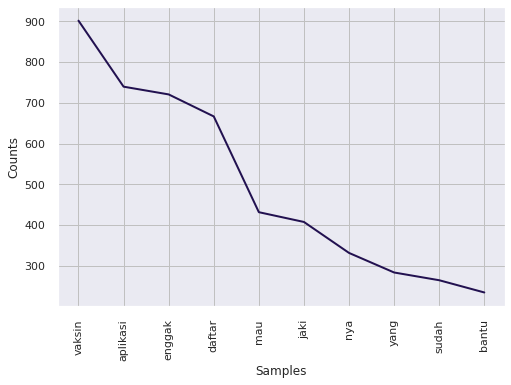

In [75]:
# plotting
fqdist.plot(10,cumulative=False)
plt.show()